# Multipoles

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [1]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
# Turn on interactive plots.
%matplotlib notebook

# Turn off interactive plots.
#%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [7]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w, stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")

<IPython.core.display.Javascript object>


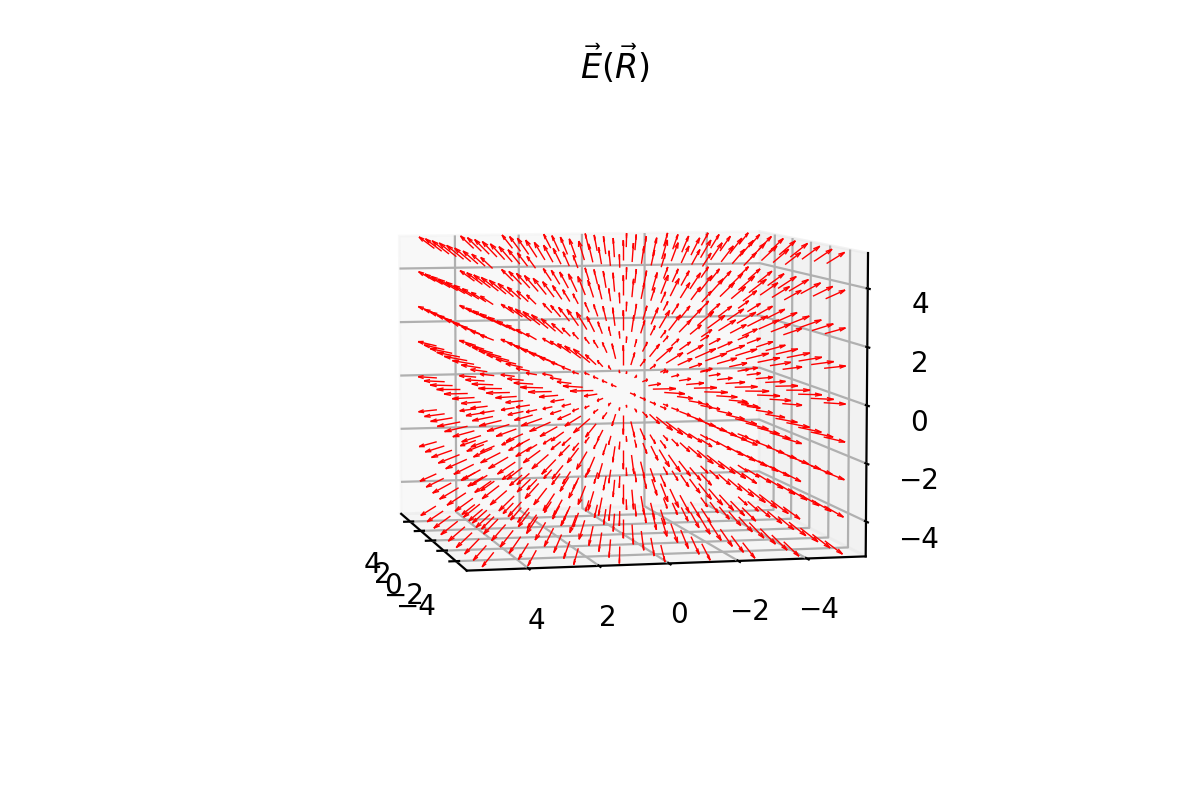

In [8]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
draw_field(X,Y,Z, Ex,Ey,Ez)

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

<IPython.core.display.Javascript object>


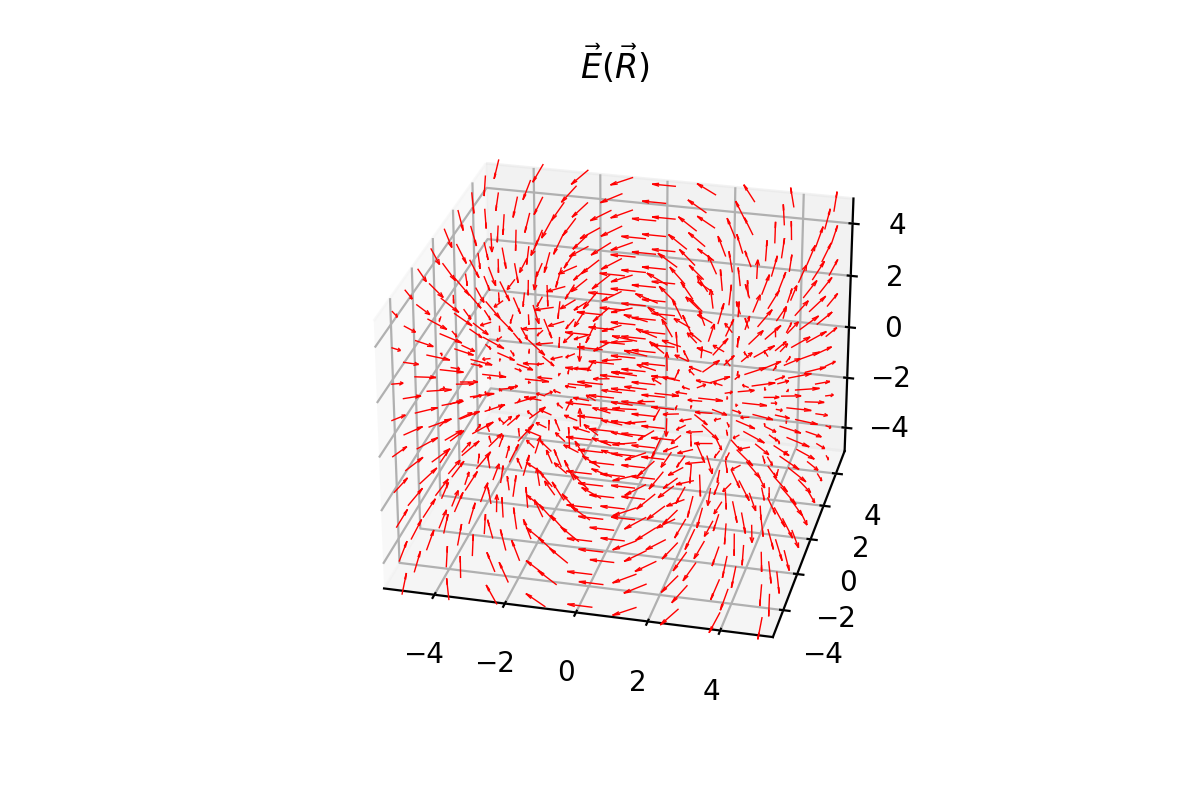

In [11]:
# Charge 1
q1 = +1
x1 = +1
y1 = 0
z1 = 0

# Charge 2
q2 = -1
x2 = -1
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2

draw_field(X,Y,Z, Ex, Ey,Ez)

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

The pattern is still projecting outwards in every direction. Most of the vectors are very similar to the single point charge, but a few vectors near the the origin have shifted directions slightly.

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference? 

Much has changed by switching the vaule of q2. The positive charge q1 still has vectors protruding away from it, but the negative charge q2 now has vectors pointing towards itself. The two opposite charges cause the electric field to curve from the postive charge to the negative charge. 

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [12]:
# Turn off interactive plotting for now.
%matplotlib inline

In [13]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

Let's look at the field of a point charge located at the origin in this representation.

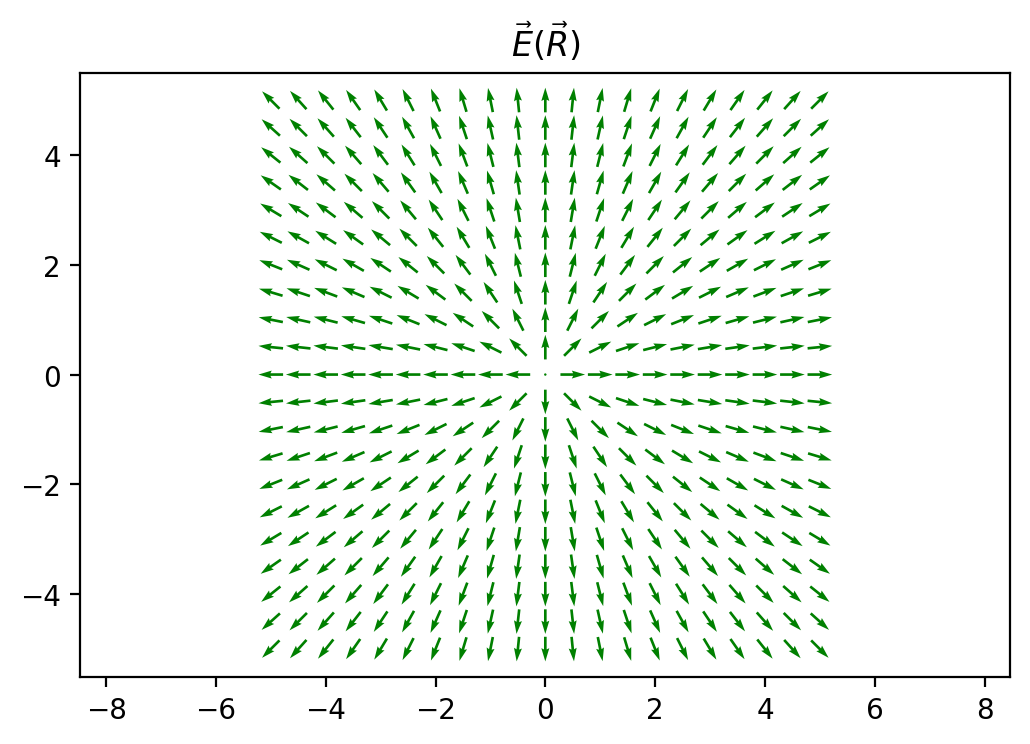

In [14]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
draw_field_2d(X,Y,Ex,Ey)

## Dipole

Change the values and locations of the charges below.

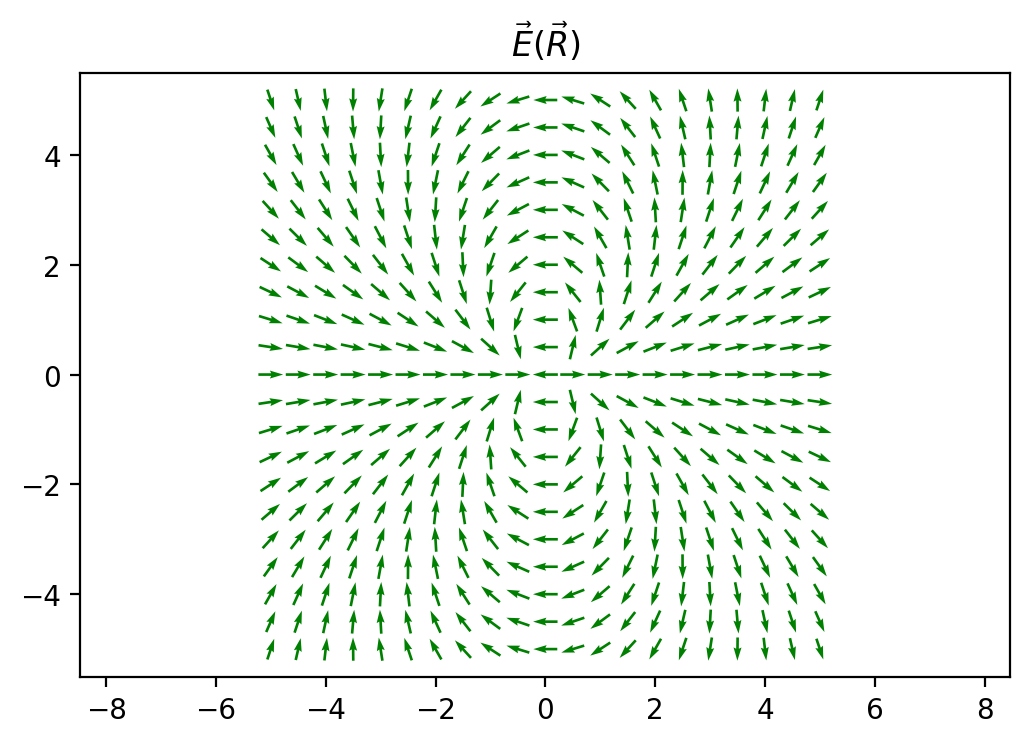

In [19]:
q1 = +1
x1 = +0.2
y1 = 0

q2 = -1
x2 = -0.2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
draw_field_2d(X,Y,Ex,Ey)

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

When the charges have the same sign, the vectors do not curve. When close to negative charges, the vectors will point in the direction of the stronger charge. When farther away from negative charges, the vectors appear to point to both charges. For positive charges, vectors close by will point away from the stronger charge and vectors further away will point away from both charges.

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

When the charges are opposite and have different magnitudes, a small curve forms near the charges. However, when further away from the charges, the charge with the larger magnitude dictates the overall direction of the field (i.e. positve pushes away, negative pulls toward).

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

When the charges are opposite and have equal magnitudes, the vecotrs from the positve charge curve toward the negative charge. When close to the charges, the curve is tight, but when further away, the curve is wide. 

## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

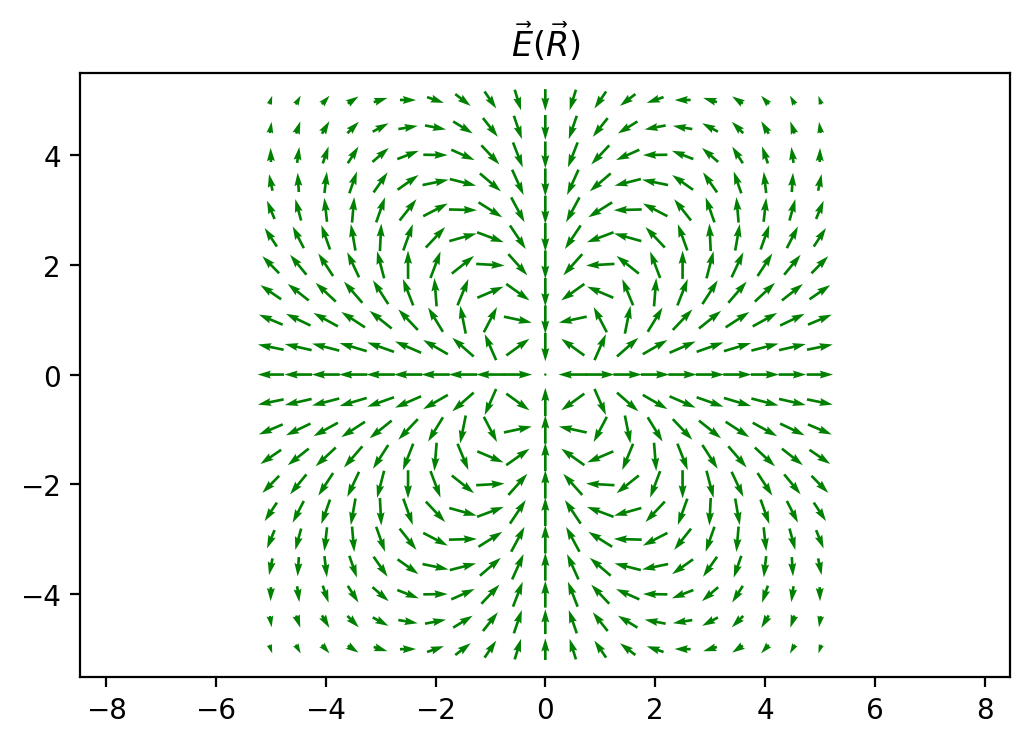

In [20]:
# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

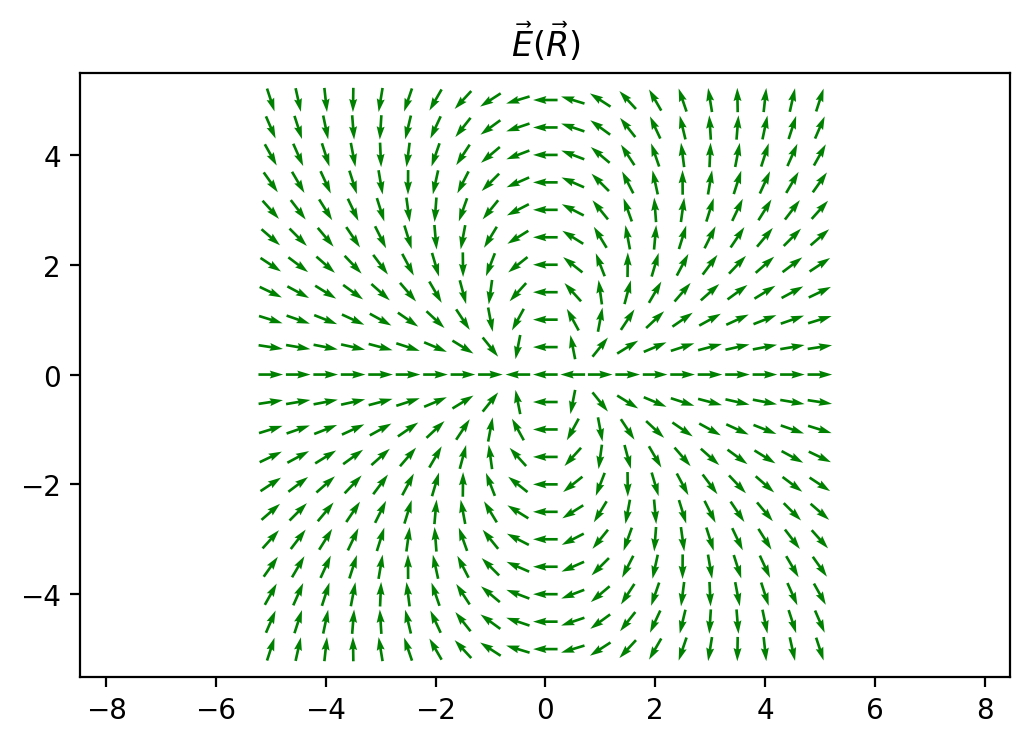

In [21]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.5
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

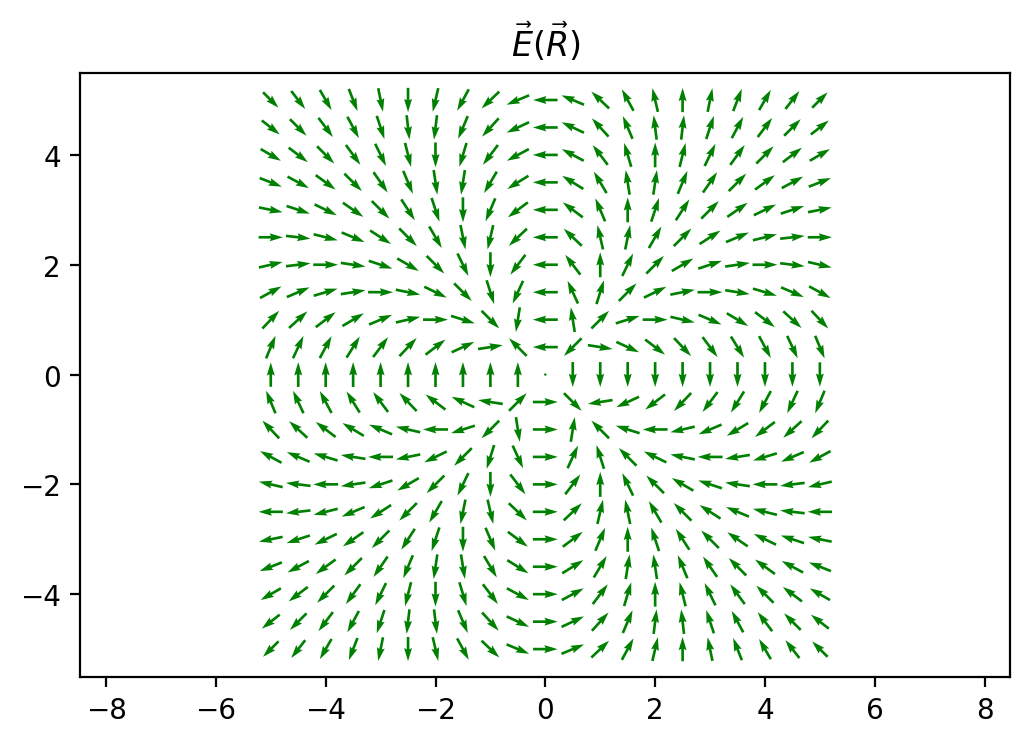

In [22]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

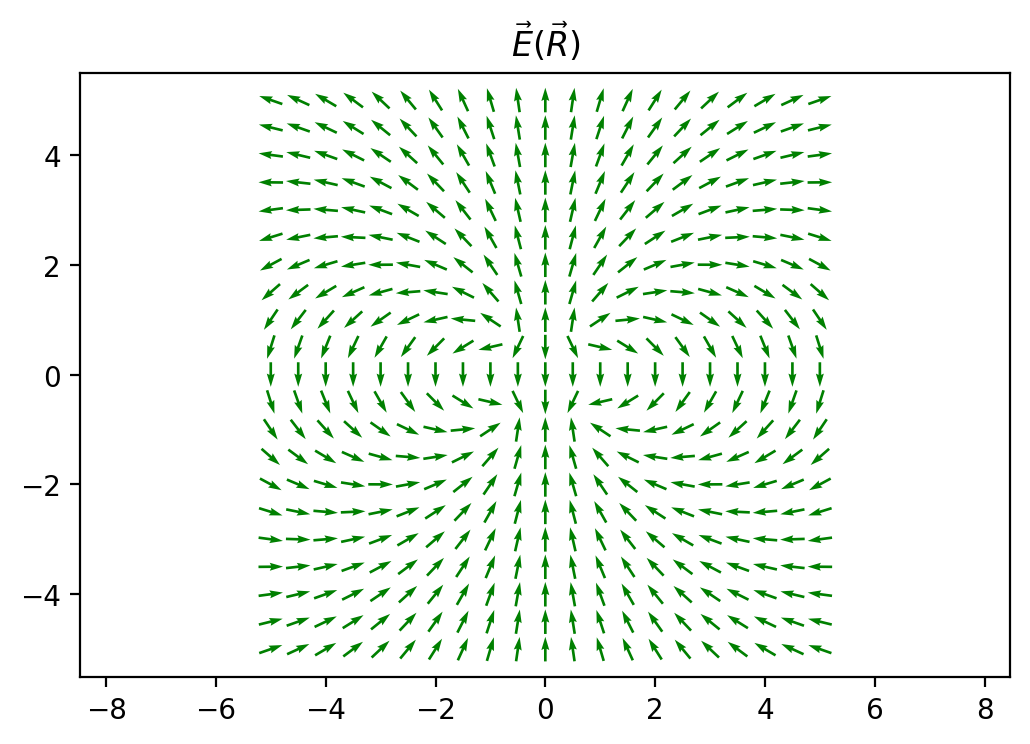

In [23]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = +1
x3 = -0.5
y3 = +0.5

q4 = -1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

The plots with only two main curve patterns are dipole fields  and the plots with four main curve patterns are quadrupole fields. Dipole makes sense for two curve patterns as the di- prefix means two, and quadripole makes sense for four curve patterns as the quad- prefix means four.

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

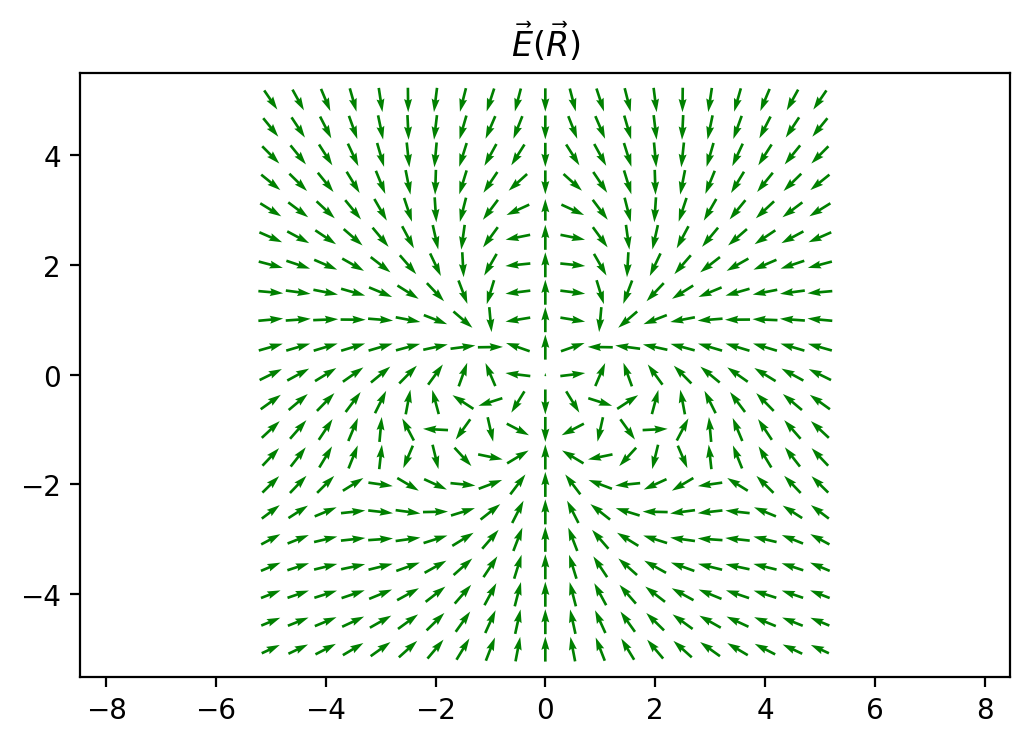

In [59]:
q1 = +6
x1 = 0
y1 = 0

q2 = -2
x2 = 0
y2 = -1

q3 = -2
x3 = -0.866
y3 = +0.5

q4 = -2
x4 = +0.866
y4 = +0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

What did you find?

I believe I made a tripole by using three dipoles and sticking the positve ends at the center with each negative end seperated 1 unit out 120 degrees from each other. This makes a biohazard symbol pattern. However, this might actually be a hexpole... There are six curves or loops from this setup and the more I research the more I agree that tripoles cannot be made as we only have positive and negative charges. We need some kind of third charge to make tripoles. 

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

Which representation seems most useful to you?  Why?

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!